In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_results = pd.read_csv('../Results/similarity.csv')
df = pd.read_csv('../Results/similarity.csv')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


distortions = []

# num max de clusters a provar
max_clusters = 10


for n_clusters in range(1, max_clusters+1):
    # Crear el modelo de clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # Ajustar el modelo a los datos
    kmeans.fit(df)
    # Calcular la distorsión (inertia) y añadirla a la lista
    distortions.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, max_clusters+1), distortions, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorsión')
plt.show()


AttributeError: 'NoneType' object has no attribute 'split'

        Mol1  Mol2  Similarity  Cluster
0          0     1    0.954669        1
1          0     2    0.938462        1
2          0     3    0.770980        1
3          0     4    0.889984        1
4          0     5    0.948649        1
...      ...   ...         ...      ...
166748   574   576    0.879493        1
166749   574   577    0.523710        0
166750   575   576    0.898721        1
166751   575   577    0.521288        0
166752   576   577    0.515910        0

[166753 rows x 4 columns]


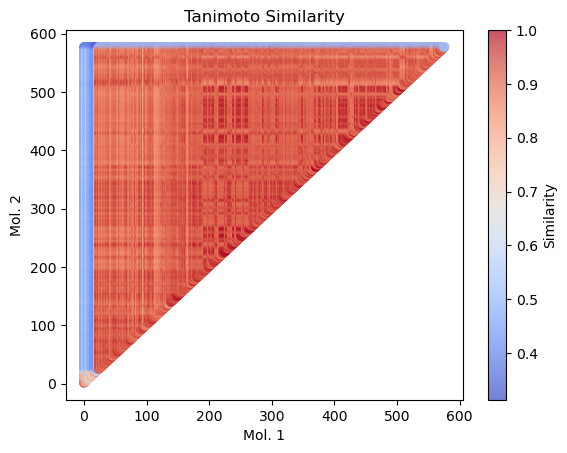

In [9]:
# Supongamos que tienes un DataFrame llamado df_results con las columnas 'Mol1', 'Mol2' y 'Similarity'

# Crear una matriz de características para el clustering
X = df_results[['Similarity']]

# Crear un objeto KMeans con el número deseado de clusters
n_clusters = 2  # Número de clusters que deseas crear
kmeans = KMeans(n_clusters=n_clusters)

# Realizar el clustering
kmeans.fit(X)

# Obtener las etiquetas de cluster asignadas a cada molécula
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
df_results['Cluster'] = labels

# Imprimir el DataFrame con las etiquetas de cluster
print(df_results)

# Crear el scatter plot
plt.scatter(df_results['Mol1'], df_results['Mol2'], c=df_results['Similarity'], cmap='coolwarm', alpha=0.7)

# Personalizar el scatter plot
plt.title('Tanimoto Similarity')
plt.xlabel('Mol. 1')
plt.ylabel('Mol. 2')
plt.colorbar(label='Similarity')

# Mostrar el scatter plot
plt.show()


166753
Total de valores mayores que 0.6: 152891


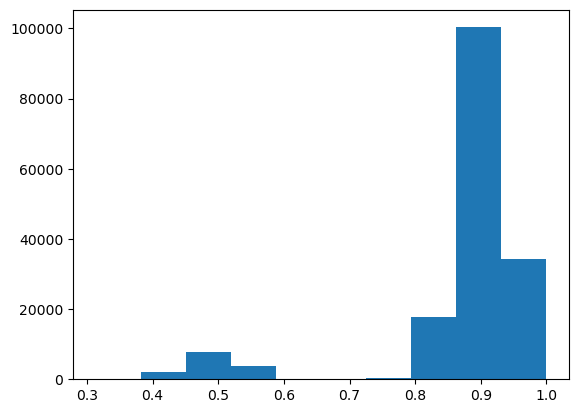

In [16]:
df_results.hist
plt.hist(df_results.Similarity)

print (len(df_results['Similarity']))

# Calcular el total de valores mayores que 0.6 en la columna 'Similarity'
total_valores_mayores_06 = (df_results['Similarity'] > 0.6).sum()

# Imprimir el total
print("Total de valores mayores que 0.6:", total_valores_mayores_06)


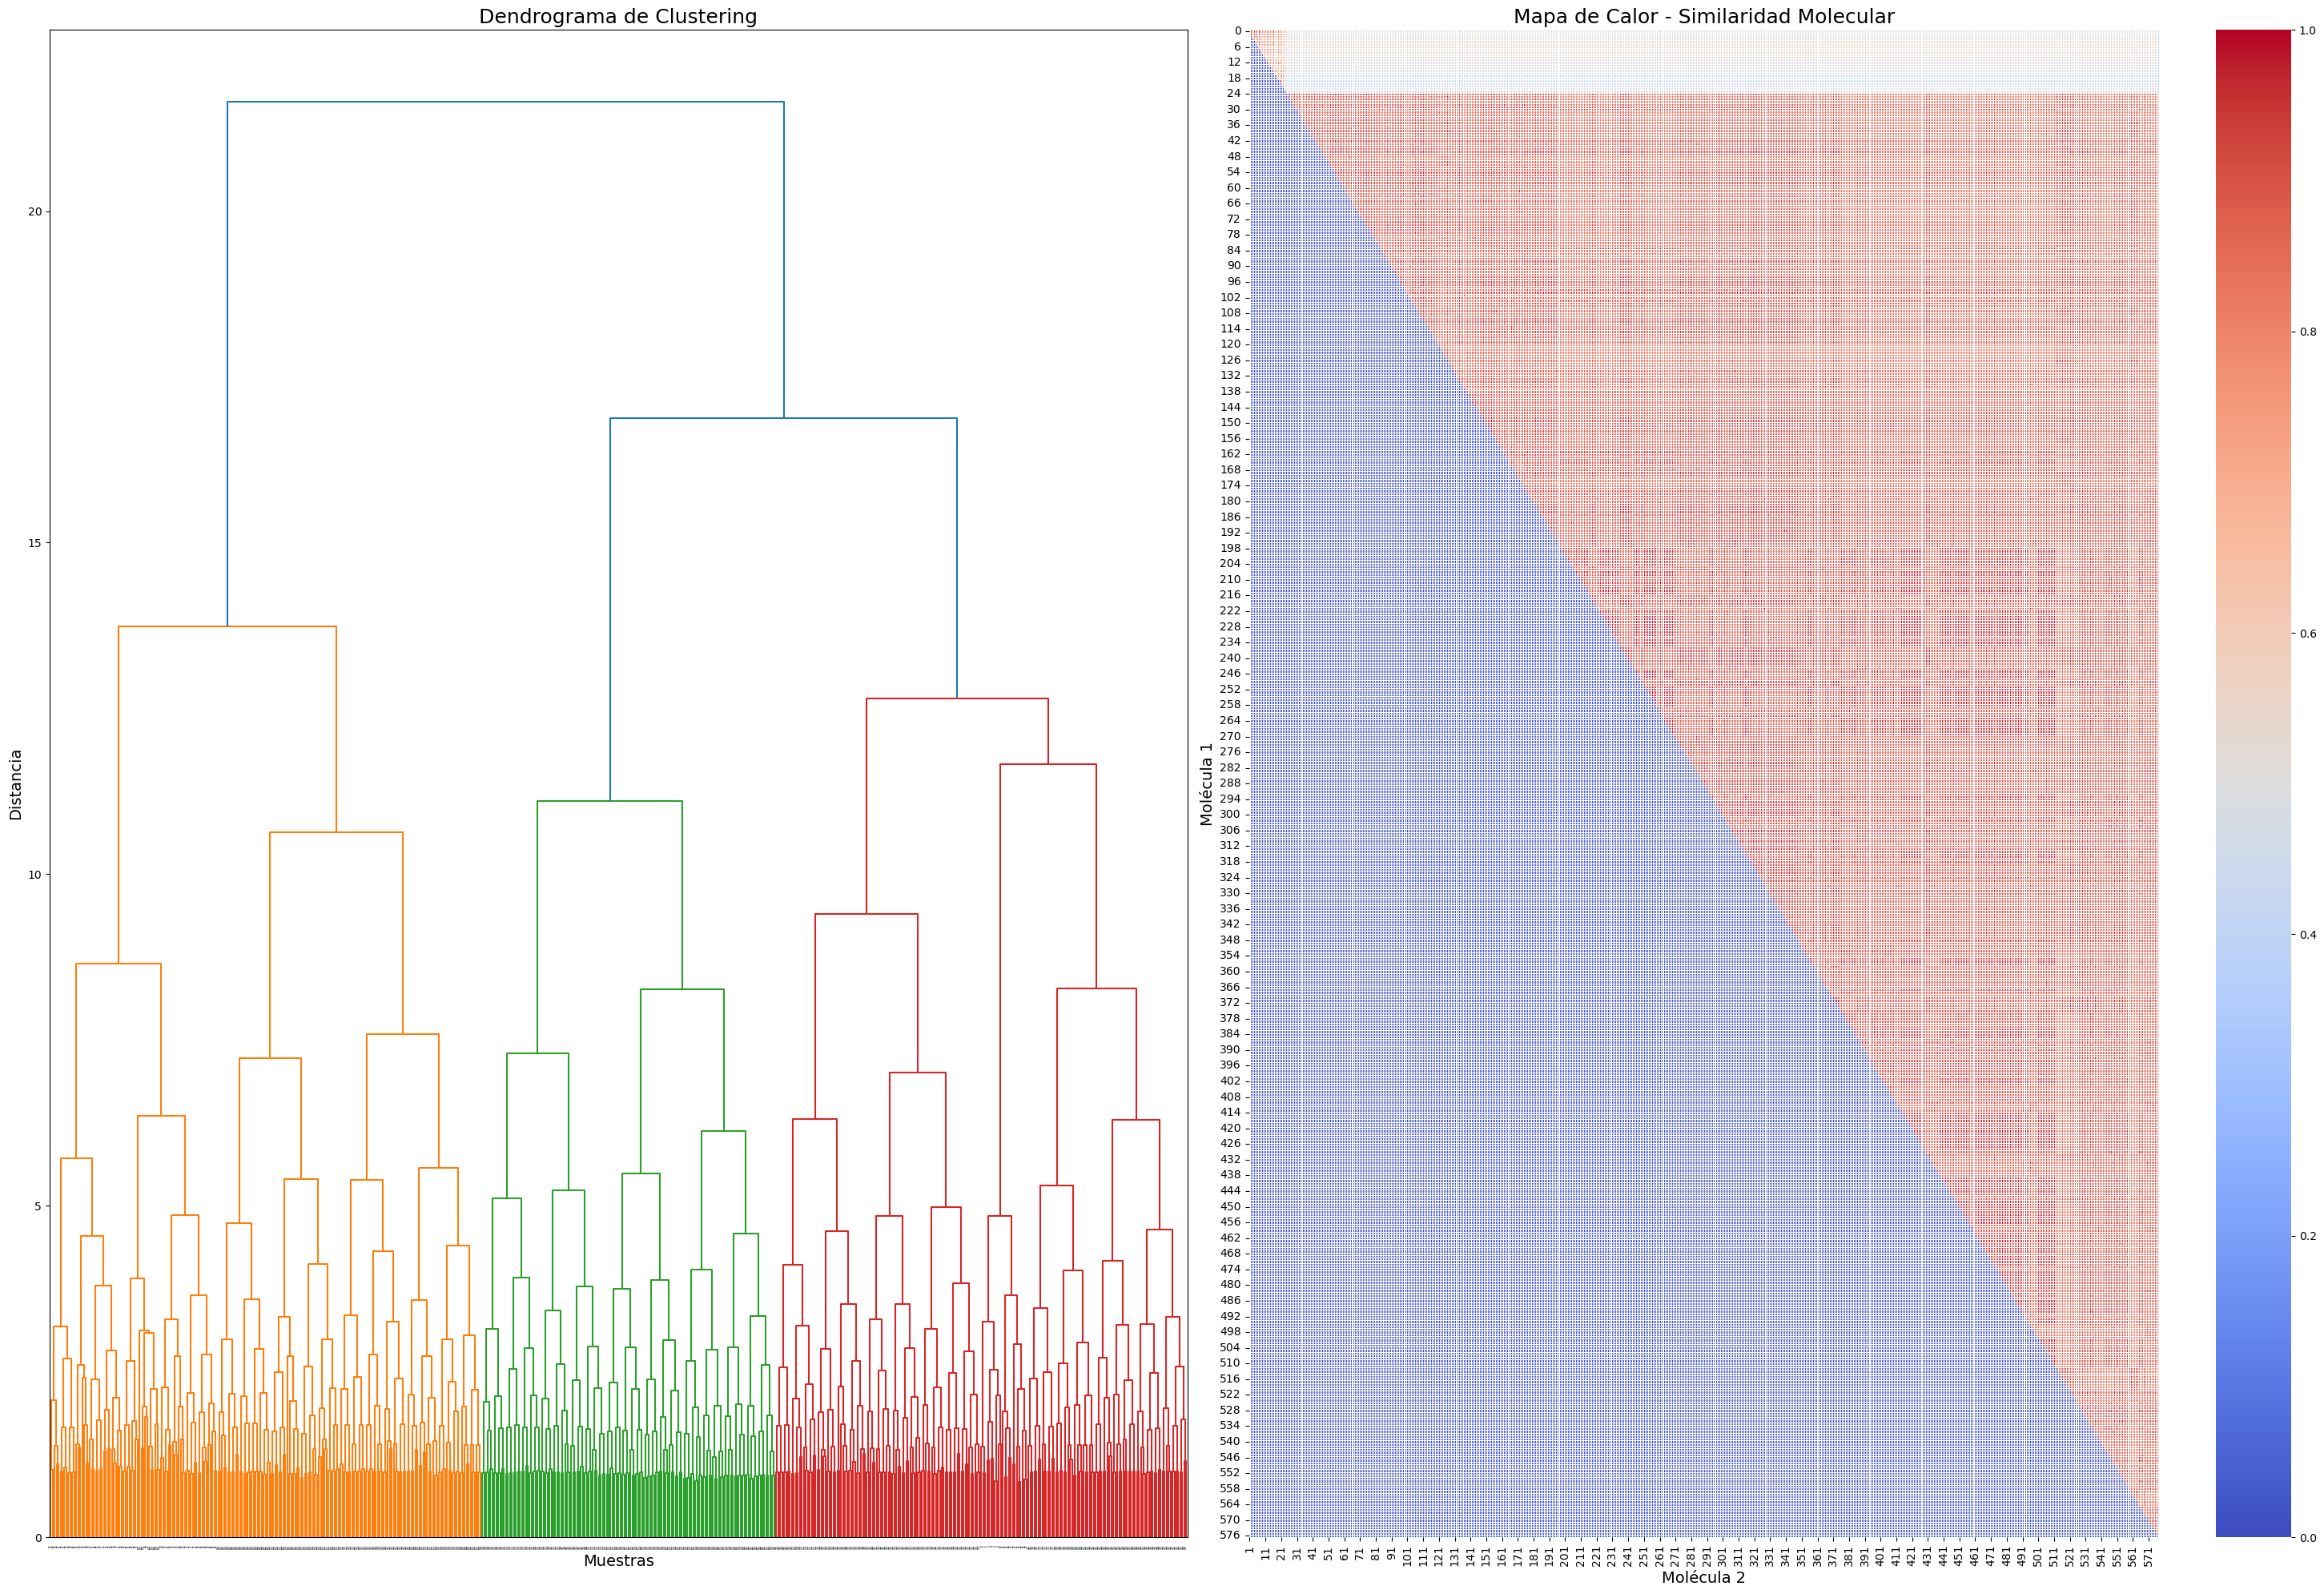

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Supongamos que tienes un DataFrame llamado df_results con las columnas 'Mol1', 'Mol2', 'Similarity' y 'Cluster'

# Crear una matriz de similitud
matrix = df_results.pivot(index='Mol1', columns='Mol2', values='Similarity').fillna(0)

# Calcular la matriz de distancias
distances = 1 - matrix.values

# Calcular los enlaces utilizando el método de enlace completo (complete linkage)
links = linkage(distances, method='complete')

# Configurar los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 20))

# Tramar el dendrograma en el primer subplot
dendrogram(links, labels=matrix.index, leaf_rotation=90, leaf_font_size=2, ax=ax1)
ax1.set_title('Dendrograma de Clustering', fontsize=18)
ax1.set_xlabel('Muestras', fontsize=14)
ax1.set_ylabel('Distancia', fontsize=14)

# Tramar el heatmap en el segundo subplot
#sns.heatmap(matrix, cmap='coolwarm', annot=False, linewidths=0.5, ax=ax2)
sns.heatmap(matrix, cmap='coolwarm', annot=False, linewidths=0.5, ax=ax2, vmin=0, vmax=1)  # Añade vmin y vmax
ax2.set_title('Mapa de Calor - Similaridad Molecular', fontsize=18)
ax2.set_xlabel('Molécula 2', fontsize=14)
ax2.set_ylabel('Molécula 1', fontsize=14)

# Ajustar los subplots para evitar superposición
plt.tight_layout()

# Mostrar el dendrograma y el heatmap juntos
plt.show()
